# Jan Izydorczyk
# Sprawozdanie 3

In [63]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 22:22:05) [MSC v.1916 64 bit (AMD64)]
Wersja numpy: 1.20.1
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


# Zadanie 1

## Podpunkt 1.1

In [64]:
def apply_fun(f, *args):
    return np.array(list(map(f, *args)))

In [65]:
def get_sq_error(f_appr, xs, ys):
    ys_appr = apply_fun(f_appr, xs)
    return sum((ys - ys_appr) ** 2)

## Podpunkt 1.2

In [110]:
xs = np.array([4, 7, 11, 13, 17])
ys = np.array([2, 0, 2, 6, 7])

a_s = np.linspace(0, 1, 20)
b_s = np.linspace(-3, 0, 20)

In [111]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
A, B = np.meshgrid(a_s, b_s)
Z = np.array([[get_sq_error(lambda xs: a * xs + b, xs, ys) for a in a_s]for b in b_s])

## Wykres zależności wartości błędu średnio kwadratowego względem a i b

<IPython.core.display.Javascript object>


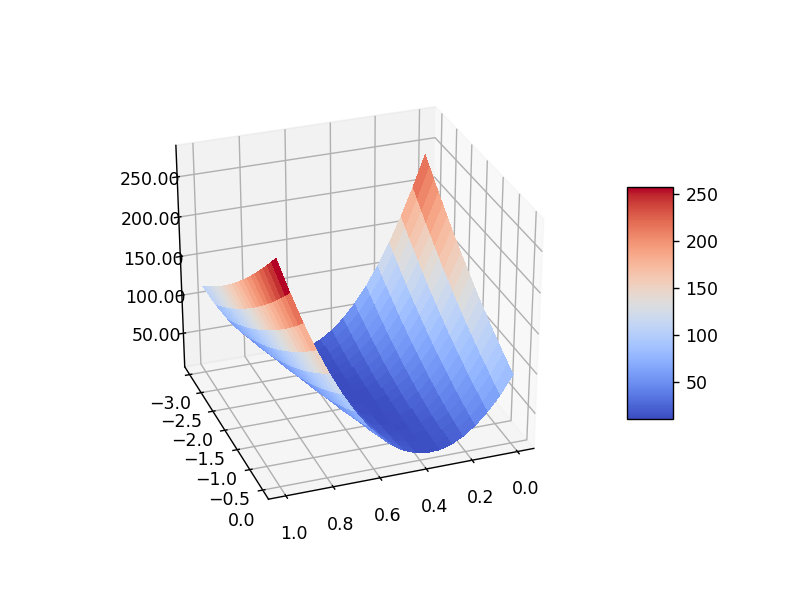

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 70)

## Podpunkt 1.3

In [113]:
def get_linear_aprox(xs, ys):
    n = len(xs)
    A = np.ones(shape=(n, 2))
    A[:, 0] = xs
    a, b = np.linalg.solve(A.T @ A, A.T @ ys)
    return a, b

In [114]:
a, b = get_linear_aprox(xs, ys)
print(f'a: {round(a, 2)}, b: {round(b, 2)}')

a: 0.49, b: -1.66


In [115]:
print(xs)
print(ys)

[ 4  7 11 13 17]
[2 0 2 6 7]


In [116]:
def plot_aprox(f_appr, xs, ys):
    plt.scatter(xs, ys)
    min_x = np.min(xs)
    max_x = np.max(xs)
    xs_range = np.linspace(min_x, max_x, 1000)
    ys_range = f_appr(xs_range)
    plt.plot(xs_range, ys_range)

### Wykres zawierajacy punkty oraz prostą aproksymowaną

<IPython.core.display.Javascript object>


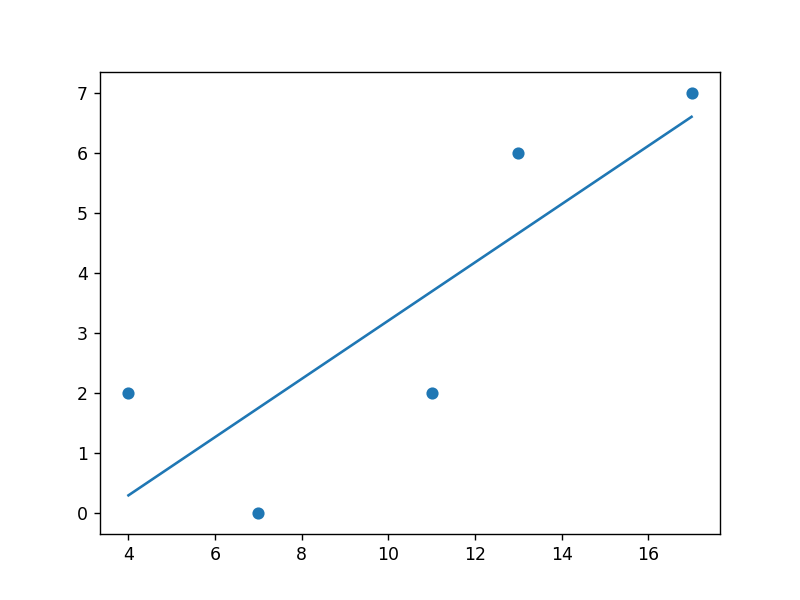

In [123]:
f_appr = lambda xs: a * xs + b
plot_aprox(f_appr, xs, ys)

In [73]:
print(f'Błąd średnio kwadratowy dla wyliczonej prostej jest równy: \
{round(get_sq_error(f_appr, xs, ys), 2)}')

Błąd średnio kwadratowy dla wyliczonej prostej jest równy: 10.78


Wyliczone wartości $a$ i $b$ mieszczą się w zakresie $[0, 1] x [-3, 0]$ i wartość błędu średnio kwadratowego jest minimalna dla tego zakresu (a właściwie jest minimum globalnym). 

## Podpunkt 1.4

In [119]:
def get_interpolation(xs, ys):
    def f(x):
        reses = np.zeros(len(xs))
        for i in range(len(xs)):
            res = 1             
            for j in range(len(xs)):
                if i == j:
                    continue
                res *= (x - xs[j]) / (xs[i] - xs[j])
            reses[i] = res
        return np.dot(reses, ys)
    return f

In [120]:
f_inter = get_interpolation(xs, ys)

In [126]:
def plot_aprox_and_inter(f_appr, f_inter, xs, ys):
    plt.scatter(xs, ys)
    min_x = np.min(xs)
    max_x = np.max(xs)
    xs_range = np.linspace(min_x, max_x, 1000)
    ys_range = f_appr(xs_range)
    plt.plot(xs_range, ys_range)
    ys_range = apply_fun(f_inter, xs_range)
    plt.plot(xs_range, ys_range)

<IPython.core.display.Javascript object>


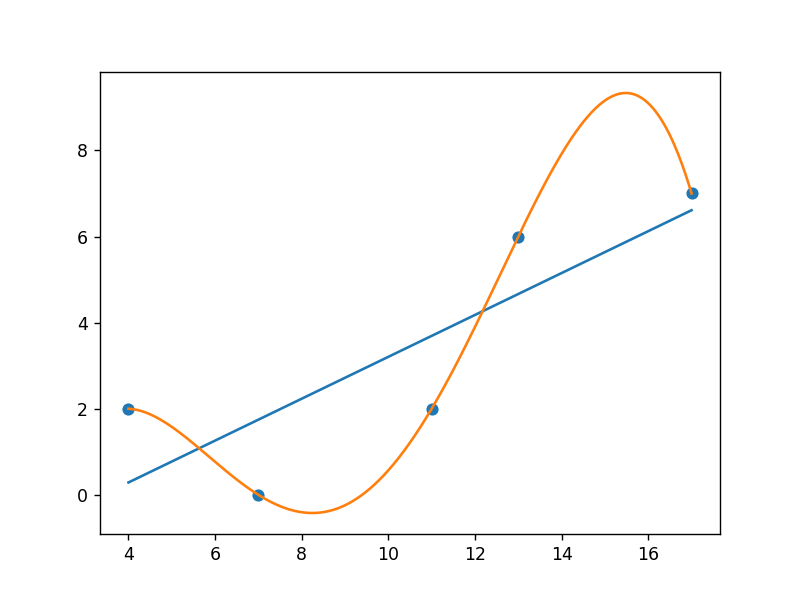

In [127]:
plot_aprox_and_inter(f_appr, f_inter, xs, ys)

## TO DO

## Podpunkt 1.5

In [129]:
xs = np.array([2, 4, 7, 11, 13, 17])
ys = np.array([15, 2, 0, 2, 6, 7])

In [130]:
a, b = get_linear_aprox(xs, ys)
print(f'a: {round(a, 2)}, b: {round(b, 2)}')

a: -0.19, b: 7.06


<IPython.core.display.Javascript object>


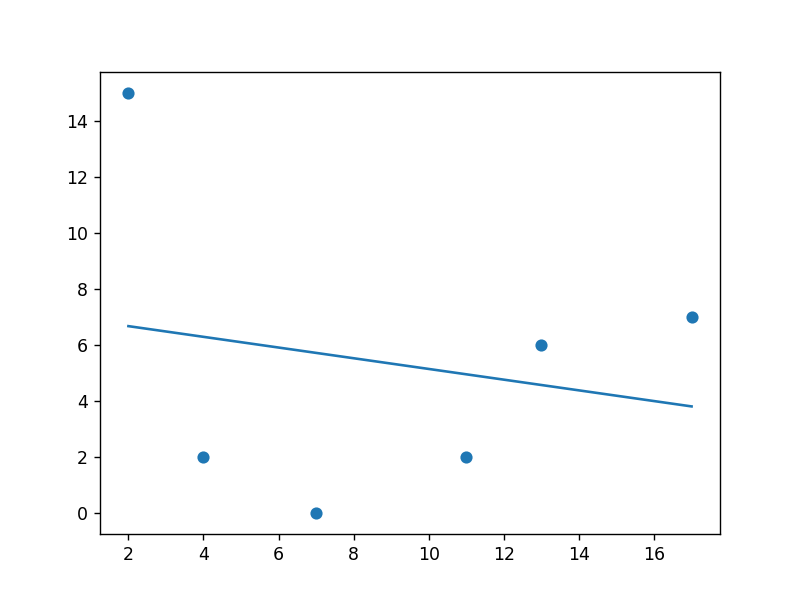

In [131]:
f_appr = lambda xs: a * xs + b
plot_aprox(f_appr, xs, ys)

## TO DO

# Zadanie 2

In [81]:
def get_log_cos_exp_aprox(xs, ys):
    n = len(xs)
    A = np.ones(shape=(n, 3))
    A[:, 0] = np.log(xs)
    A[:, 1] = np.cos(xs)
    A[:, 2] = np.exp(xs)
    a, b, c = np.linalg.solve(A.T @ A, A.T @ ys)
    return a, b, c

In [132]:
xs = np.array([0.24, 0.65, 0.95, 1.24, 1.73, 2.01, 2.23, 2.52 ,2.77, 2.99])
ys = np.array([0.23, -0.26, -1.10, -0.45, 0.27, 0.10, -0.29, 0.24, 0.56, 1.00])

In [133]:
a, b, c = get_log_cos_exp_aprox(xs, ys)
print(f'a: {round(a, 2)}, b: {round(b, 2)}, c: {round(c, 2)}')

a: -1.04, b: -1.26, c: 0.03


<IPython.core.display.Javascript object>


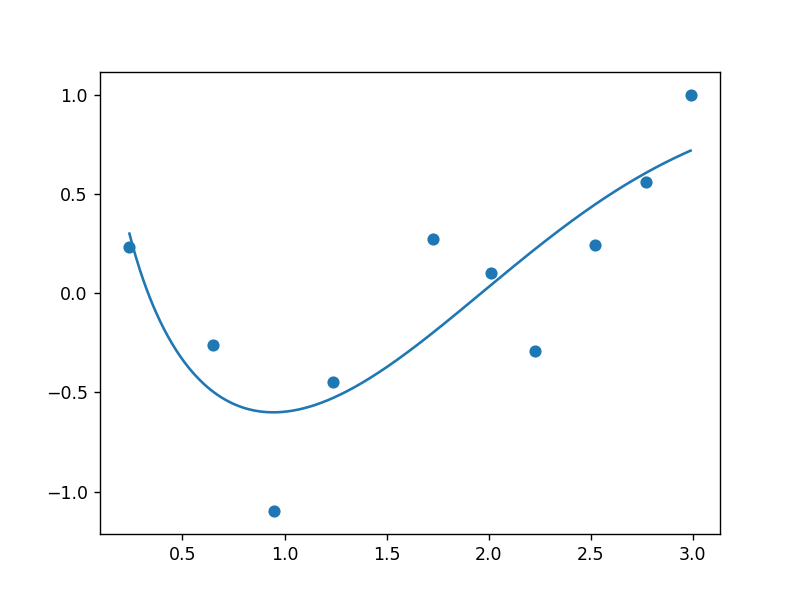

In [134]:
f_appr = lambda xs: a * np.log(xs) + b * np.cos(xs) + c * np.exp(xs)
plot_aprox(f_appr, xs, ys)

# TO DO

# Zadanie 3

In [85]:
def solution(U):
    # find the eigenvalues and eigenvector of U(transpose).U
    e_vals, e_vecs = np.linalg.eig(np.dot(U.T, U))  
    # extract the eigenvector (column) associated with the minimum eigenvalue
    return e_vecs[:, np.argmin(e_vals)] 

$$e^{-x} = \sum_{n=0}^{\infty}\frac{(-1)^nx^n}{n!} $$

$$a_n = \frac{(-1)^n}{n!} $$

$$e^{-x} \approx \frac{p(x)}{q(x)}$$

$$p(x)=  p_0 + p_1 x + ... p_n x^n$$

$$q(x)=  1 + q_1 x + ... q_m x^m$$

$$ \sum^k_{i=0}a_iq_{k-i} - p_k = 0,   q_0=1 $$

$$ \sum^{k}_{i=1}a_{k-i}q_{i} - p_k = -a_k $$

\begin{bmatrix}
0 & 0 & 0 & ... & 0 & -1 & 0 & 0& ... & 0 & 0 & 0\\
a_1 & 0 & 0 & ...  & 0 & 0 & -1 & 0 & ... & 0 & 0 & 0\\
a_2 & a_1 & 0 & ...  & 0 & 0 & 0 & -1& ... & 0 & 0 & 0\\
a_{n-2} & a_{n-3} & a_{n-4} & ...  & 0 & 0 & 0 & 0 & ... & 0 & -1 & 0\\
a_{n-1} & a_{n-2} & a_{n-3} & ...  & 0 & 0 & 0 & 0 & ... & 0 & 0 & -1\\
\end{bmatrix}

In [136]:
def get_exp_pade_appro(m, n):
    N = n + m
    a_s = np.zeros(N + 2)
    a_s[0] = 1
    for k in range(1, N + 2):
        a_s[k] = a_s[k -1] / k
    a_s[1::2] *= -1
    p_s = np.zeros(m + 1)
    q_s = np.zeros(n + 1)
    mat = np.zeros(shape=(N + 1, N + 1))
    for t in range(N + 1):
        if 0 < t <= n:     
            mat[t, :t] = a_s[t-1::-1]
        elif t > n:
            mat[t, :n+1] = a_s[t:t-n-1:-1]
        if t <= m:
            mat[t,-m - 1+ t] = -1
    q_p = np.linalg.solve(mat, -a_s[:-1])
    
    p_s = np.copy(q_p[n:])
    q_s[0] = 1
    q_s[1:] = np.copy(q_p[:n])
    return p_s, q_s

In [88]:
def apply_polynomial(x_0, coof):
    def f(x):
        res = coof[-1]
        for c in coof[-2::-1]:
            res = res * (x - x_0) + c
        return res
    return f

In [161]:
def print_exp_appro(m, n):
    ps, qs = get_exp_pade_appro(m, n)
    print('ps =', ps)
    print('qs =', qs)

    f = lambda x: apply_polynomial(0, ps)(x) / apply_polynomial(0, qs)(x)
    xs = np.linspace(0, 2, 1000)
    ys = apply_fun(f, xs)
    plt.scatter(xs, ys, s=1)
    plt.scatter(xs[::10], np.exp(-xs)[::10], s=1,c='orange')

ps = [ 1.00000000e+00  5.03800000e+03 -3.02250000e+03  8.39333333e+02
 -1.39791667e+02 -1.00000000e+00  3.33333333e-02]
qs = [1.000e+00 5.039e+03 2.016e+03 3.360e+02 2.800e+01]


<IPython.core.display.Javascript object>


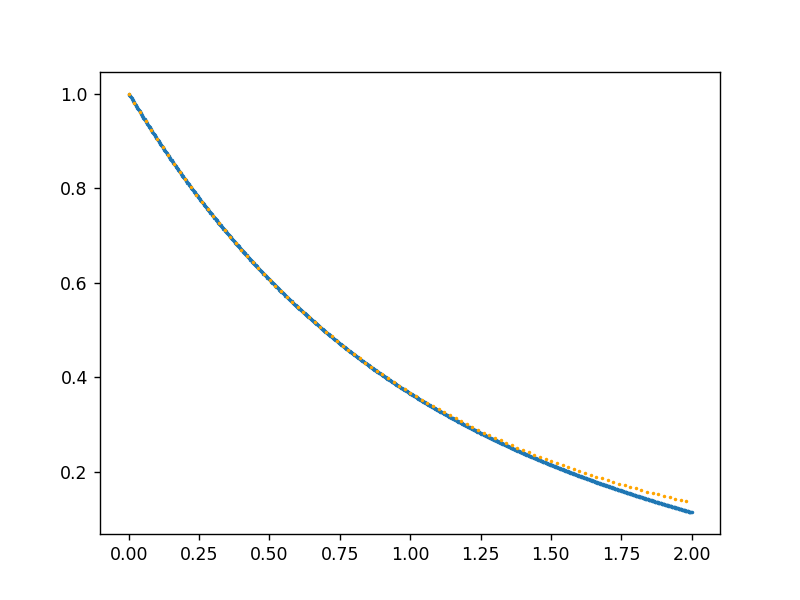

In [163]:
print_exp_appro(6, 4)

ps = [ 1.00000000e+00  1.00686000e+05 -3.62386200e+04  5.03140000e+03
 -2.79363889e+02]
qs = [1.00000000e+00 1.00687000e+05 6.44478800e+04 1.91359467e+04
 3.41376778e+03 3.91824444e+02 2.79936111e+01]


<IPython.core.display.Javascript object>


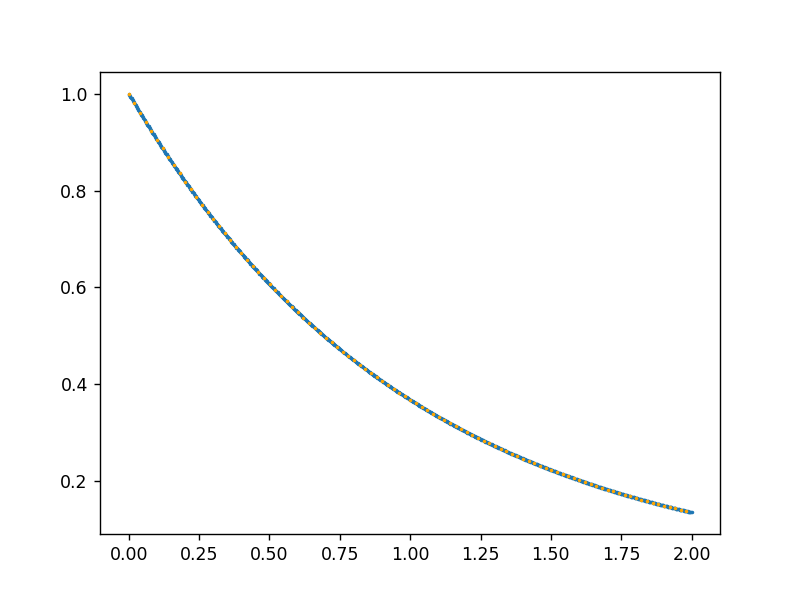

In [164]:
print_exp_appro(4, 6)